# 1. Introduction 

## 1.1 Description & Disscusion of the Background
Ho Chi Minh City (Vietnamese: Thành Phố Hồ Chí Minh), commonly known as Saigon (Vietnamese: Sài Gòn) or by the abbreviations HCMC or HCM, is the largest city in Vietnam
    
In 2019, Ho Chi Minh City was estimated to contain 8.9 million residents, which was up from 7.4 million in 2010 and 5.3 million in 2000. Thus, the city is both large and growing, but in one respect, it is smaller than it seems — the official statistics include both registered residents and migrant workers. On the other hand, the city is actually larger than the official resident count in that its metropolitan area includes over 10 million people. Finally, we can add over three million tourists to the total number of people actually present in Ho Chi Minh City during any given year.
    
The eight percent of the Vietnamese population who live in Ho Chi Minh City are responsible for 20% of national GDP, 28% of industrial production and a third of the nation's shipping tonnage. Per capita GDP was measured at USD 5,100 in 2014. which was much higher than the national average of USD 2,052. The industries engaged in are very diverse, including such areas as agriculture, mining, processing of seafood, construction, banking, commerce and tourism. The local economy is 51% service-based, 48% forestry and agriculture and one percent "everything else." Vietnam being a Communist country, it should not be surprising to learn that 33% of the Ho Chi Minh economy is state-owned and only five percent is in the private sector. However, the big surprise is that the remainder (62%) is fueled by foreign investments.

As __new migrant to the city, we may want to __rent business premises to open a restaurant__, so we looking for the location with reasonable rent price. In the other hand, we want to choose the choose the district according to the population and social places density. And by this report we hope we can capture some remarkable points in this direction.
    
Currently, HCM is divided into 19 districts and 05 rural districts surrounding. In this report, we will focus on only __19 main districts using a map and information chart where the rent price of each districts and how these are clustered according to the venue density__

## 1.2 Data Preparation
To consider the problem we can list the datas as below:

- I collect coordinates of all 19 districts via geopy and used it to create choropleth map of Rent Estate Price Index of HCM.
- I used Forsquare API to get the most common venues of given District of HCM
- I collected latest per square meter Rent Estate Price Averages for each District from real estate web page

# 2.Methodology

In [ ]:
#import libs - just for beauty styling, because IBM watson LITE account run so slow so better import one by one
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values



# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

In [1]:
#import libs
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    certifi-2019.11.28         |   py36h9f0ad1d_1         149 KB  conda-forge
    openssl-1.1.1e             |       h516909a_0         2.1 MB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1

As a database, I used GitHub repository in my study. My master data which has the main components Districts, Rent Price, Latitude and Longitude information of Ho Chi Minh City.

#### Get data 

In [3]:
# define the dataframe columns
column_names = ['Districts', 'Area', 'Pop_den', 'Rent_price', 'Latitude', 'Longitude']

# instantiate the dataframe
hcm_df = pd.DataFrame(columns=column_names)

hcm_df.head()

district_data_array = [{'Districts':'Quan 1', 'Area':10, 'Pop_den':206.098, 'Rent_price':8461.54}, 
{'Districts':'Quan 2', 'Area':11, 'Pop_den':138.194, 'Rent_price':2115.38}, 
{'Districts':'Quan 3', 'Area':14, 'Pop_den':200.002, 'Rent_price':3461.54}, 
{'Districts':'Quan 4', 'Area':15, 'Pop_den':191.925, 'Rent_price':769.23}, 
{'Districts':'Quan 5', 'Area':15, 'Pop_den':195.643, 'Rent_price':2884.62}, 
{'Districts':'Quan 6', 'Area':14, 'Pop_den':258.444, 'Rent_price':1615.38}, 
{'Districts':'Quan 7', 'Area':10, 'Pop_den':211.141, 'Rent_price':1153.85}, 
{'Districts':'Quan 8', 'Area':16, 'Pop_den':381.721, 'Rent_price':1038.46}, 
{'Districts':'Quan 9', 'Area':13, 'Pop_den':227.816, 'Rent_price':1538.46}, 
{'Districts':'Quan 10', 'Area':15, 'Pop_den':241.522, 'Rent_price':3076.92}, 
{'Districts':'Quan 11', 'Area':16, 'Pop_den':230.451, 'Rent_price':1346.15}, 
{'Districts':'Quan 12', 'Area':11, 'Pop_den':346.638, 'Rent_price':2692.31}, 
{'Districts':'Go Vap', 'Area':16, 'Pop_den':520.928, 'Rent_price':1576.92}, 
{'Districts':'Tan Binh', 'Area':15, 'Pop_den':401.633, 'Rent_price':3923.08}, 
{'Districts':'Tan Phu', 'Area':11, 'Pop_den':385.314, 'Rent_price':1692.31}, 
{'Districts':'Binh Thanh', 'Area':20, 'Pop_den':474.206, 'Rent_price':2153.85}, 
{'Districts':'Phu Nhuan', 'Area':15, 'Pop_den':180.272, 'Rent_price':2384.62}, 
{'Districts':'Thu Duc', 'Area':12, 'Pop_den':373.278, 'Rent_price':2576.92}, 
{'Districts':'Binh Tan', 'Area':10, 'Pop_den':500.493, 'Rent_price':3000}]

#get coordinates via geocode 
for data_HCM in district_data_array:
    address = str(data_HCM['Districts']) + ', Ho Chi Minh City, VietNam'
    geolocator = Nominatim(user_agent="hcm_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    hcm_df = hcm_df.append({'Districts': str(data_HCM['Districts']), 'Area':  data_HCM['Area'], 
                            'Pop_den':  data_HCM['Pop_den'],'Rent_price':  data_HCM['Rent_price'] , 
                            'Latitude': latitude, 'Longitude': longitude}, ignore_index=True)
hcm_df.head(19)

,Districts,Area,Pop_den,Rent_price,Latitude,Longitude
0,Quan 1,10,206.098,8461.54,10.774540,106.699184
1,Quan 2,11,138.194,2115.38,10.791116,106.736729
2,Quan 3,14,200.002,3461.54,10.783529,106.687098
3,Quan 4,15,191.925,769.23,10.759243,106.704890
4,Quan 5,15,195.643,2884.62,10.756129,106.670376
5,Quan 6,14,258.444,1615.38,10.746928,106.634495
6,Quan 7,10,211.141,1153.85,10.736573,106.722432
7,Quan 8,16,381.721,1038.46,10.740400,106.665843
8,Quan 9,13,227.816,1538.46,10.824543,106.818015
9,Quan 10,15,241.522,3076.92,10.773198,106.667833


I used a python folium library to visualize geographic details of this city and its district and I created a map of Ho Chi Minh with districts superimposed on top. I used latitude and longitude values to get the visual as below

*Note: the closer marker's color to red the higher rent price

In [4]:
!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    folium-0.5.0               |             py_0          45 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    altair-4.0.1               |             py_0         575 KB  conda-forge
    branca-0.4.0               |             py_0          26 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         673 KB

The following NEW packages will be INSTALLED:

    altair:  4.0.1-py_0 conda-forge
    branca:  0.4.0-py_0 conda-forge
    folium:  0.5.0-py_0 conda-forge
    vincent: 0.4.4-py_1 conda-forge


folium-0.5.0         | 45 KB     | ##################################### | 1

In [5]:
hcm_lat = 10.762622
hcm_long = 106.660172

#get color for marker
def marker_color(elev): 
    if elev in range(0,2000): 
        col = 'green'
    elif elev in range(2000,5000): 
        col = 'blue'
    elif elev in range(5000,8000): 
        col = 'orange'
    else: 
        col='red'
    return col 

# Creat Ho Chi Minh city map
hcm_map = folium.Map(
    location=[hcm_lat, hcm_long],
    zoom_start=12
)

# Add Marker to the map, the stronger color the higher average apartment price
for index, row in hcm_df.iterrows():
    #price_percentage = int(row["Avg-ApartmentPrice"]*1000/hcm_df[['Avg-ApartmentPrice']].sum())
    folium.Marker(
    location=[row["Latitude"], row["Longitude"]],
    popup= str(row["Rent_price"]) + ' USD/m2',
    icon=folium.Icon(color=marker_color(int(row["Rent_price"])), icon='info-sign'),
    ).add_to(hcm_map)
    
hcm_map

In [6]:
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
#Foursquare API call
CLIENT_ID = 'B23CFH1SYEYR0O2XTINAJDMZDLTC0Q2QTTAHFGBVKUIBR0KA' # your Foursquare ID
CLIENT_SECRET = '2RBPNHNRKFVI1RQ2KERGXQT1K1ATK0J5C12D0HF3X50AWZF5' # your Foursquare Secret
VERSION = '20180604'
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

venues_list=[]
for index, row in hcm_df.iterrows():
    LIMIT = 100 
    radius = 2000
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        row["Latitude"], 
        row["Longitude"], 
        radius, 
        LIMIT)
    results = requests.get(url).json()["response"]['groups'][0]['items']
    venues_list.append([(
            row["Districts"], 
            row["Latitude"], 
            row["Longitude"], 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Districts', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']

Your credentails:
CLIENT_ID: B23CFH1SYEYR0O2XTINAJDMZDLTC0Q2QTTAHFGBVKUIBR0KA
CLIENT_SECRET:2RBPNHNRKFVI1RQ2KERGXQT1K1ATK0J5C12D0HF3X50AWZF5


I utilized the Foursquare API to explore the districts and segment them. I designed the limit as 100 venues and the radius 2000 meter for each district from their given latitude and longitude information. Here is a head of the list Venues name, category, latitude and longitude information from Foursquare API.

In summary of this data venues were returned by Foursquare for all districts. Here is a merged table of districts and venues.

In [8]:
nearby_venues.head(20)

,Districts,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Quan 1,10.77454,106.699184,Pizza 4P's,10.773301,106.697599,Pizza Place
1,Quan 1,10.77454,106.699184,Pasteur Street Brewing Company,10.775220,106.700894,Brewery
2,Quan 1,10.77454,106.699184,Bep Me In,10.773810,106.698152,Vietnamese Restaurant
3,Quan 1,10.77454,106.699184,Liberty Central Saigon Citypoint Hotel,10.774758,106.700795,Hotel
4,Quan 1,10.77454,106.699184,Takashimaya,10.773194,106.701075,Department Store
5,Quan 1,10.77454,106.699184,Silverland Yen Hotel,10.774850,106.696160,Hotel
6,Quan 1,10.77454,106.699184,Quán Lộc Thành,10.772472,106.698441,Vietnamese Restaurant
7,Quan 1,10.77454,106.699184,The Old Compass Cafe,10.774816,106.700685,Café
8,Quan 1,10.77454,106.699184,O Lé,10.774772,106.699524,Spanish Restaurant
9,Quan 1,10.77454,106.699184,Saxn'art Jazz Club,10.774068,106.700905,Jazz Club


In [9]:
print(nearby_venues.shape)

(1060, 7)


Let's check how many venues were returned for each district

In [10]:
nearby_venues_count = pd.DataFrame(nearby_venues.groupby(['Districts']).size())
nearby_venues_count.rename(columns={ nearby_venues_count.columns[0]: "Venues_Count" }, inplace = True)
nearby_venues_count.sort_values(by='Venues_Count', ascending=False, axis=0, inplace=True)
nearby_venues_count.head(19)

,Venues_Count
Districts,
Quan 3,100
Phu Nhuan,100
Quan 1,100
Quan 10,100
Quan 4,100
Quan 5,100
Tan Binh,76
Quan 2,75
Quan 7,64


We can see that main districts reached the 100 limit of venues. On the other hand; Thu Duc, Quan 12, Binh Tan, Binh Thanh, Quan 9 are below 50 venues in our given coordinates with Latitude and Longitude, in the above graph.

The result doesn’t mean that inquiry runs all the possible results in boroughs. Actually, it depends on given Latitude and Longitude information and here we just run a single Latitude and Longitude pair for each Districts. We can increase the possibilities with Neighborhood information with more Latitude and Longitude information.

We can visualize the results for each Districts by below barchart


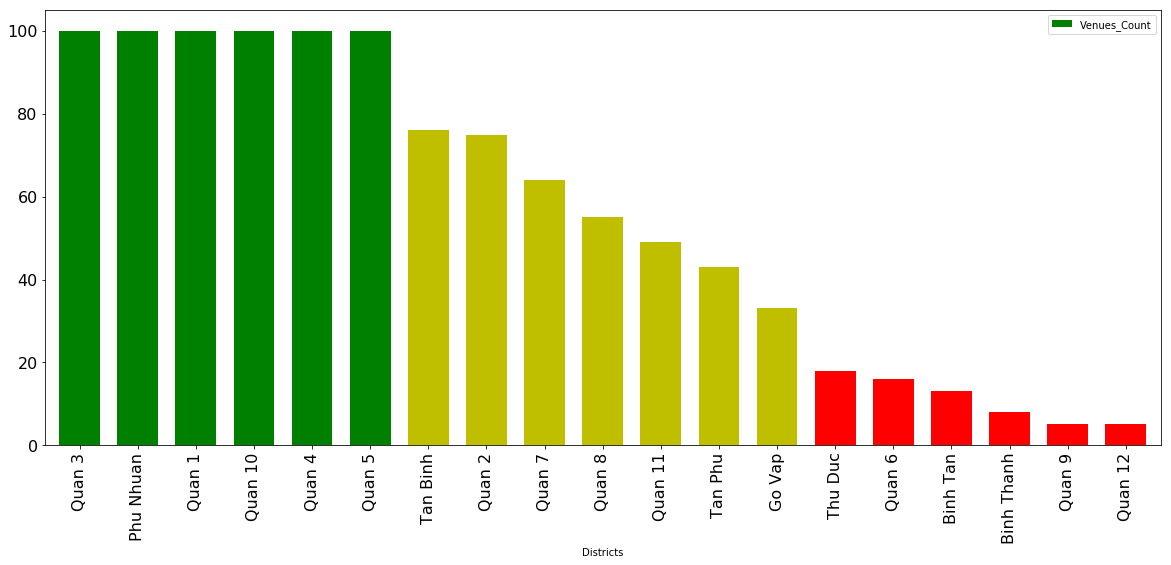

In [12]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# Create barchart for venue visualization for each

labelsize=14

barchart = nearby_venues_count.plot(kind='bar', 
                                    figsize=(20, 8), 
                                    width=0.7, 
                                    color=[np.where(nearby_venues_count['Venues_Count']> 80, 'g', np.where(nearby_venues_count['Venues_Count'] > 20, 'y', 'r'))], 
                                    fontsize=16)

barchart

In [13]:
print('There are {} uniques categories.'.format(len(nearby_venues['Venue Category'].unique())))

There are 126 uniques categories.


In [14]:
# Further explorer data

# one hot encoding
hcm_onehot = pd.get_dummies(nearby_venues[['Venue Category']], prefix="", prefix_sep="")

# add Borough column back to dataframe
hcm_onehot['Districts'] = nearby_venues['Districts'] 

# move Borough column to the first column
fixed_columns = [hcm_onehot.columns[-1]] + list(hcm_onehot.columns[:-1])
hcm_onehot = hcm_onehot[fixed_columns]

hcm_onehot.head()

,Districts,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bakery,Bar,Basketball Stadium,Bathing Area,Bed & Breakfast,Beer Bar,Beer Garden,Bistro,Bookstore,Boutique,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Café,Cantonese Restaurant,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Convenience Store,Convention Center,Cupcake Shop,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Dumpling Restaurant,Electronics Store,Exhibit,Fabric Shop,Farmers Market,Fast Food Restaurant,Flea Market,Flower Shop,Food,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gastropub,German Restaurant,Gift Shop,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lounge,Market,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Movie Theater,Multiplex,Museum,Music Venue,Nightclub,Noodle House,Opera House,Outdoors & Recreation,Park,Pharmacy,Pizza Place,Plaza,Pool,Pub,Ramen Restaurant,Residential Building (Apartment / Condo),Resort,Restaurant,Rock Club,Sandwich Place,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Snack Place,Soup Place,Spa,Spanish Restaurant,Speakeasy,Steakhouse,Street Food Gathering,Summer Camp,Supermarket,Sushi Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Temple,Tennis Court,Thai Restaurant,Theme Park,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Water Park,Whisky Bar,Yoga Studio
0,Quan 1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Quan 1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Quan 1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,Quan 1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Quan 1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
hcm_onehot.shape

(1060, 127)

In [17]:
hcm_grouped = hcm_onehot.groupby('Districts').mean().reset_index()
#hcm_grouped= hcm_grouped.set_index('Districts').join(hcm_df.set_index('Districts'))
hcm_grouped_clustering = hcm_grouped.drop('Districts',1)
hcm_grouped_clustering

,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,BBQ Joint,Bakery,Bar,Basketball Stadium,Bathing Area,Bed & Breakfast,Beer Bar,Beer Garden,Bistro,Bookstore,Boutique,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Café,Cantonese Restaurant,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Convenience Store,Convention Center,Cupcake Shop,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Dumpling Restaurant,Electronics Store,Exhibit,Fabric Shop,Farmers Market,Fast Food Restaurant,Flea Market,Flower Shop,Food,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gastropub,German Restaurant,Gift Shop,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lounge,Market,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Movie Theater,Multiplex,Museum,Music Venue,Nightclub,Noodle House,Opera House,Outdoors & Recreation,Park,Pharmacy,Pizza Place,Plaza,Pool,Pub,Ramen Restaurant,Residential Building (Apartment / Condo),Resort,Restaurant,Rock Club,Sandwich Place,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Snack Place,Soup Place,Spa,Spanish Restaurant,Speakeasy,Steakhouse,Street Food Gathering,Summer Camp,Supermarket,Sushi Restaurant,Tapas Restaurant,Tattoo Parlor,Tea Room,Temple,Tennis Court,Thai Restaurant,Theme Park,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Water Park,Whisky Bar,Yoga Studio
0,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.307692,0.000000,0.000000,0.00,0.00,0.230769,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.076923,0.0,0.076923,0.000000,0.000000,0.00,0.00,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.076923,0.000000,0.00,0.00,0.00000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.000,0.000000,0.076923,0.00,0.00,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.153846,0.000000,0.000000,0.000000,0.00000,0.00,0.00,0.000000,0.000000,0.0,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00
1,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.00,0.00,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.125000,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00000,0.000000,0.00,0.125000,0.00,0.000000,0.000000,0.00,0.125,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00000,0.00,0.00,0.000000,0.000000,0.0,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.00,0.00
2,0.000000,0.000000,0.00,0.000000,0.00,0.060606,0.000000,0.00000,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.030303,0.030303,0.030303,0.000000,0.030303,0.000000,0.000000,0.212121,0.000000,0.000000,0.00,0.00,0.060606,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.0,

In [35]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Districts']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Districts'] = hcm_grouped['Districts']

for ind in np.arange(hcm_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(hcm_grouped.iloc[ind, :], num_top_venues)

In summary of there is 126 unique categories were returned by Foursquare, then I created a table which shows list of top 10 venue category for each districts in below table

In [36]:
neighborhoods_venues_sorted.head(20)

,Districts,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Binh Tan,Café,Coffee Shop,Shopping Mall,Multiplex,Fast Food Restaurant,Italian Restaurant,Fabric Shop,Exhibit,Flea Market,Farmers Market
1,Binh Thanh,Café,Bookstore,Vietnamese Restaurant,Convenience Store,Diner,Mobile Phone Shop,Market,Flower Shop,Flea Market,Fast Food Restaurant
2,Go Vap,Café,Shopping Mall,Coffee Shop,Supermarket,Pizza Place,Multiplex,Asian Restaurant,Market,Park,Seafood Restaurant
3,Phu Nhuan,Vietnamese Restaurant,Café,Coffee Shop,Hotel,Seafood Restaurant,Breakfast Spot,Snack Place,Park,Japanese Restaurant,Korean Restaurant
4,Quan 1,Vietnamese Restaurant,Hotel,Café,Coffee Shop,Pizza Place,Vegetarian / Vegan Restaurant,Massage Studio,Bar,Italian Restaurant,Clothing Store
5,Quan 10,Vietnamese Restaurant,Café,Coffee Shop,Hotel,Noodle House,Bookstore,Vegetarian / Vegan Restaurant,Seafood Restaurant,Asian Restaurant,Market
6,Quan 11,Café,Chinese Restaurant,Vietnamese Restaurant,Seafood Restaurant,Cantonese Restaurant,Shopping Mall,Gym,Bookstore,Department Store,Multiplex
7,Quan 12,Department Store,Café,Farmers Market,Flea Market,Supermarket,Food,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner
8,Quan 2,Café,Restaurant,French Restaurant,Vietnamese Restaurant,Coffee Shop,Gym / Fitness Center,Bakery,BBQ Joint,Japanese Restaurant,Bistro
9,Quan 3,Vietnamese Restaurant,Hotel,Vegetarian / Vegan Restaurant,Café,Coffee Shop,Pizza Place,Bar,Hotel Bar,Breakfast Spot,Sandwich Place


We have some common venue categories in boroughs. For this reason I used an unsupervised learning K-means algorithm to cluster the boroughs. K-Means algorithm is one of the most common cluster methods of unsupervised learning.

First, I will run K-Means to cluster the boroughs into 6 clusters


In [32]:
# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn import metrics 
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler


#K Mean model evaluation
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = 6

    #Building and fitting the model 
kmeanModel = KMeans(n_clusters=K).fit(hcm_grouped_clustering) 
kmeanModel.fit(hcm_grouped_clustering)     
    
distortions.append(sum(np.min(cdist(hcm_grouped_clustering, kmeanModel.cluster_centers_, 
                   'euclidean'),axis=1)) / hcm_grouped_clustering.shape[0]) 
inertias.append(kmeanModel.inertia_) 
  
mapping1[K] = sum(np.min(cdist(hcm_grouped_clustering, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / hcm_grouped_clustering.shape[0] 
mapping2[K] = kmeanModel.inertia_ 


In [33]:
kmeanModel.labels_[0:19]

array([3, 5, 3, 0, 0, 0, 1, 4, 0, 0, 0, 0, 3, 0, 1, 2, 1, 3, 3],
      dtype=int32)

In [37]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeanModel.labels_)

In [38]:
hcm_merged = hcm_df
hcm_merged = hcm_merged.join(neighborhoods_venues_sorted.set_index('Districts'), on='Districts')
hcm_merged.head(19)

,Districts,Area,Pop_den,Rent_price,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Quan 1,10,206.098,8461.54,10.774540,106.699184,0,Vietnamese Restaurant,Hotel,Café,Coffee Shop,Pizza Place,Vegetarian / Vegan Restaurant,Massage Studio,Bar,Italian Restaurant,Clothing Store
1,Quan 2,11,138.194,2115.38,10.791116,106.736729,0,Café,Restaurant,French Restaurant,Vietnamese Restaurant,Coffee Shop,Gym / Fitness Center,Bakery,BBQ Joint,Japanese Restaurant,Bistro
2,Quan 3,14,200.002,3461.54,10.783529,106.687098,0,Vietnamese Restaurant,Hotel,Vegetarian / Vegan Restaurant,Café,Coffee Shop,Pizza Place,Bar,Hotel Bar,Breakfast Spot,Sandwich Place
3,Quan 4,15,191.925,769.23,10.759243,106.704890,0,Vietnamese Restaurant,Hotel,Café,Seafood Restaurant,Spa,Bar,Hostel,Beer Bar,Indian Restaurant,Mexican Restaurant
4,Quan 5,15,195.643,2884.62,10.756129,106.670376,0,Vietnamese Restaurant,Chinese Restaurant,Café,Coffee Shop,Noodle House,Dim Sum Restaurant,Vegetarian / Vegan Restaurant,Bookstore,Food Truck,Asian Restaurant
5,Quan 6,14,258.444,1615.38,10.746928,106.634495,3,Café,Coffee Shop,Department Store,Fast Food Restaurant,Supermarket,Market,Shopping Mall,Cantonese Restaurant,Movie Theater,Park
6,Quan 7,10,211.141,1153.85,10.736573,106.722432,0,Vietnamese Restaurant,Café,Coffee Shop,Gym / Fitness Center,Japanese Restaurant,Asian Restaurant,Fried Chicken Joint,Spa,Ice Cream Shop,Supermarket
7,Quan 8,16,381.721,1038.46,10.740400,106.665843,1,Chinese Restaurant,Dim Sum Restaurant,Vietnamese Restaurant,Dessert Shop,Coffee Shop,Café,Multiplex,Noodle House,Seafood Restaurant,Market
8,Quan 9,13,227.816,1538.46,10.824543,106.818015,2,Summer Camp,Fountain,Asian Restaurant,Furniture / Home Store,Tea Room,Fabric Shop,Flea Market,Fast Food Restaurant,Farmers Market,Exhibit
9,Quan 10,15,241.522,3076.92,10.773198,106.667833,0,Vietnamese Restaurant,Café,Coffee Shop,Hotel,Noodle House,Bookstore,Vegetarian / Vegan Restaurant,Seafood Restaurant,Asian Restaurant,Market


We can also estimate the number of 1st Most Common Venue in each cluster. Thus, we can create a table which may help us to find proper labels for each cluster.


In [39]:
cluster_label = hcm_merged[['Cluster Labels', '1st Most Common Venue']].copy()

In [40]:
first_venue_df = cluster_label.groupby(['Cluster Labels', '1st Most Common Venue']).size()

In [41]:
new_df = first_venue_df.to_frame(name = 'count').reset_index()

In [49]:
new_df.head(20)

,Cluster Labels,1st Most Common Venue,count
0,0,Café,1
1,0,Vietnamese Restaurant,7
2,1,Café,2
3,1,Chinese Restaurant,1
4,2,Summer Camp,1
5,3,Café,5
6,4,Department Store,1
7,5,Café,1


When we examine above table we can label each cluster as follows:
- Cluster 0 : “Café” and "Vietnamese Restaurant"
- Cluster 1 : “China Town"
- Cluster 2 : “Camping”
- Cluster 3 : “Cafe”
- Cluster 4 : “Department Store”
- Cluster 5: “Not attractive Area”


One of my aim was also show the number of top 3 venues information for each district on the map. Thus, I grouped each district by the number of top 3 venues and I combined those informations in Join column.

In [43]:
top_three_venue_df = hcm_merged[['Districts', '1st Most Common Venue', '2nd Most Common Venue', '3rd Most Common Venue']].copy()
top_three_venue_df['Join'] = top_three_venue_df[['1st Most Common Venue', '2nd Most Common Venue', '3rd Most Common Venue']].agg(','.join, axis=1)
top_three_venue_df.drop(['1st Most Common Venue', '2nd Most Common Venue', '3rd Most Common Venue'], axis=1)

,Districts,Join
0,Quan 1,"Vietnamese Restaurant,Hotel,Café"
1,Quan 2,"Café,Restaurant,French Restaurant"
2,Quan 3,"Vietnamese Restaurant,Hotel,Vegetarian / Vegan..."
3,Quan 4,"Vietnamese Restaurant,Hotel,Café"
4,Quan 5,"Vietnamese Restaurant,Chinese Restaurant,Café"
5,Quan 6,"Café,Coffee Shop,Department Store"
6,Quan 7,"Vietnamese Restaurant,Café,Coffee Shop"
7,Quan 8,"Chinese Restaurant,Dim Sum Restaurant,Vietname..."
8,Quan 9,"Summer Camp,Fountain,Asian Restaurant"
9,Quan 10,"Vietnamese Restaurant,Café,Coffee Shop"


# 3. Results section where you discuss the results.

In final section, I created a table and a cluster map which have all informations for each district in Ho Chi Minh City:

- District name,
- Cluster name,
- Average Apartment Sales Price
- Top 3 number of venue

In [48]:
final_df = hcm_merged[['Districts', 'Rent_price', 'Latitude', 'Longitude', 'Cluster Labels']].copy()
final_df['Join venue'] = top_three_venue_df['Join']
final_df.head(19)


,Districts,Rent_price,Latitude,Longitude,Cluster Labels,Join venue
0,Quan 1,8461.54,10.774540,106.699184,0,"Vietnamese Restaurant,Hotel,Café"
1,Quan 2,2115.38,10.791116,106.736729,0,"Café,Restaurant,French Restaurant"
2,Quan 3,3461.54,10.783529,106.687098,0,"Vietnamese Restaurant,Hotel,Vegetarian / Vegan..."
3,Quan 4,769.23,10.759243,106.704890,0,"Vietnamese Restaurant,Hotel,Café"
4,Quan 5,2884.62,10.756129,106.670376,0,"Vietnamese Restaurant,Chinese Restaurant,Café"
5,Quan 6,1615.38,10.746928,106.634495,3,"Café,Coffee Shop,Department Store"
6,Quan 7,1153.85,10.736573,106.722432,0,"Vietnamese Restaurant,Café,Coffee Shop"
7,Quan 8,1038.46,10.740400,106.665843,1,"Chinese Restaurant,Dim Sum Restaurant,Vietname..."
8,Quan 9,1538.46,10.824543,106.818015,2,"Summer Camp,Fountain,Asian Restaurant"
9,Quan 10,3076.92,10.773198,106.667833,0,"Vietnamese Restaurant,Café,Coffee Shop"


In [45]:
# create map to visualize
map_clusters = folium.Map(location=[hcm_lat, hcm_long], zoom_start=11)

# set color scheme for the clusters
x = np.arange(K)
ys = [i + x + (i*x)**2 for i in range(K)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, avg_price, join_venue in zip(final_df['Latitude'], final_df['Longitude'], final_df['Districts'], final_df['Cluster Labels'], final_df['Rent_price'], final_df['Join venue']):
    label = folium.Popup(str(poi) + ' Cluster: ' + str(cluster) + ' Rent_price: ' + str(avg_price) + ' USD/m2 ' + ' Common venues: ' + str(join_venue))
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
map_clusters

#  4. Discussion section where you discuss any observations you noted and any recommendations you can make based on the results

As I mentioned before, Ho Chi Minh is a city with a high population density in a narrow area. The total number of measurements and population densities of the 19 districts in total can vary. As there is such a complexity, very different approaches can be tried in clustering and classification studies. Moreover, it is obvious that not every classification method can yield the same high quality results for this metropol.

I used the Kmeans algorithm as part of this clustering study. When I tested the Elbow method, I set the optimum k value to 5. However, only 19 district coordinates were used. For more detailed and accurate guidance, the data set can be expanded and the details of the neighborhood or street can also be drilled.

I also performed data analysis through this information by adding the coordinates of districts and real estate rent price averages as static data on GitHub. In future studies, these data can also be accessed dynamically from specific platforms or packages.

# 5. Conclusion section where you conclude the report.

As a result, As migrants are turning to big cities to start a business or work. For this reason, people can achieve better outcomes, profits through their access to the platforms where such information is provided.

Not only for migrants but also city managers can manage the city more regularly by using similar data analysis types or platforms.

Thank you for your attention,

Nguyen Minh Huong

# 6. Reference
6.1 <a href link = 'https://www.thitruong.today/tin-tong-hop/bang-gia-thue-mat-bang-tai-tphcm-nam-2019'> Appartment renting price</a>

6.2 <a href link = 'https://blog.rever.vn/dien-tich-va-dan-so-cac-quan-huyen-tai-tphcm-khac-nhau-ra-sao'> Population of HCM's districts </a>

6.3 Forsquare API